<a href="https://colab.research.google.com/github/Sakshi-7699/Machine-Learning-Projects/blob/master/DA_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **ASSIGNMENT 1**


Download the Iris flower dataset or any other dataset into a DataFrame. (eg https://archive.ics.uci.edu/ml/datasets/Iris ) Use Python/R and Perform following –

*  How many features are there and what are their types (e.g., numeric, nominal)?
*   Compute and display summary statistics for each feature available in the dataset.(eg. minimum value, maximum value, mean, range, standard deviation, variance and percentiles


*   Data Visualization-Create a histogram for each feature in the dataset to illustrate the
feature distributions. Plot each histogram.
*   Create a boxplot for each feature in the dataset. All of the boxplots should be combined into a single plot. Compare distributions and identify outliers.


**ATRRIBUTE TYPES**


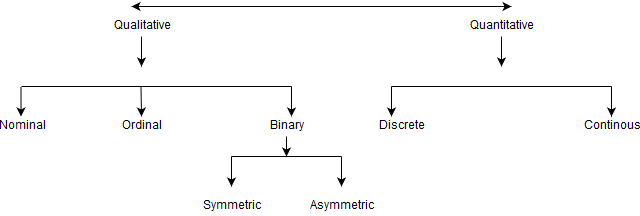

1. Nominal Attributes – related to names : categorical attributes
2. Binary Attributes :
  i) Symmetric : Both values are equally important (Gender).
  ii) Asymmetric : Both values are not equally important (Result).
3. Ordinal Attributes : ranking(order) 
4. Numeric : integer or real values.
  i) An interval-scaled attribute has values, whose differences are interpretable, but the numerical attributes do not have the correct reference point or we can call zero point.
  ii) A ratio-scaled attribute is a numeric attribute with an fix zero-point. 
5. Discrete :  finite values
6. Continuous :  infinite no of states

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print("Shape : ",df.shape)

Shape :  (150, 6)


In [10]:
#df.info()
#df.summary()
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
df.shape

(150, 6)

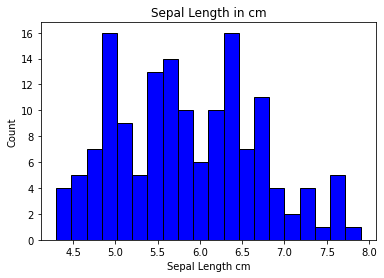

In [13]:
data = df['SepalLengthCm'] 

plt.hist(data, bins = 20, color = 'blue',edgecolor='black') 
plt.title('Sepal Length in cm') 
plt.xlabel('Sepal Length cm') 
plt.ylabel('Count') 
plt.show()


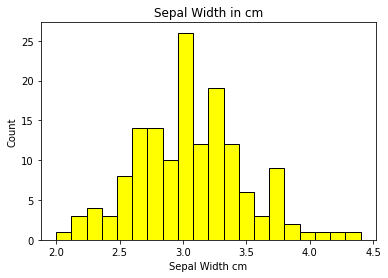

In [14]:
data = df['SepalWidthCm'] 

plt.hist(data, bins = 20, color = 'yellow',edgecolor='black') 
plt.title('Sepal Width in cm') 
plt.xlabel('Sepal Width cm') 
plt.ylabel('Count') 
plt.show()
 

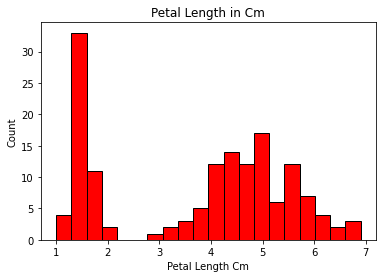

In [15]:
data = df['PetalLengthCm'] 

plt.hist(data, bins = 20, color = 'red',edgecolor='black') 
plt.title('Petal Length in Cm') 
plt.xlabel('Petal Length Cm') 
plt.ylabel('Count') 
plt.show()

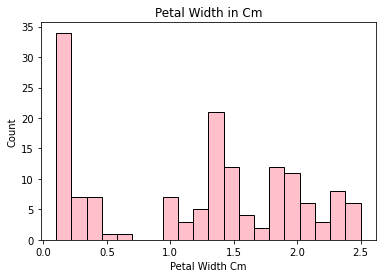

In [16]:
data = df['PetalWidthCm'] 

plt.hist(data, bins = 20, color = 'pink',edgecolor='black') 
plt.title('Petal Width in Cm') 
plt.xlabel('Petal Width Cm') 
plt.ylabel('Count') 
plt.show()


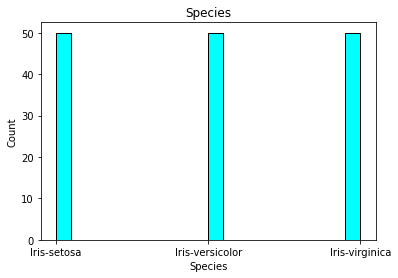

In [17]:
data = df['Species'] 

plt.hist(data, bins = 20, color = 'cyan',edgecolor='black') 
plt.title('Species') 
plt.xlabel('Species') 
plt.ylabel('Count') 
plt.show()

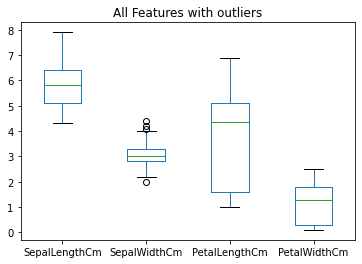

In [18]:
data_frame2=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data_frame2.plot.box(title='All Features with outliers')
plt.show()

# **ASSIGNMENT 2**


Download Pima Indians Diabetes dataset. Use Naive Bayes‟ Algorithm for classification



*   Load the data from CSV file and split it into training and test datasets.
*   summarize the properties in the training dataset so that we can calculate
probabilities and make predictions.
*   Classify samples from a test dataset and a summarized training dataset




### [Naive Bayes Algorithm ](https://www.geeksforgeeks.org/naive-bayes-classifiers/)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/diabetes.csv')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


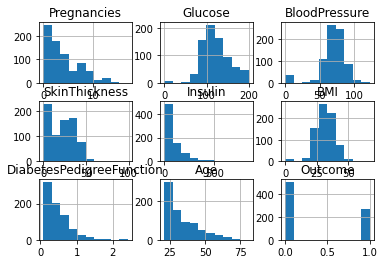

In [22]:
df.hist()
plt.show()

In [23]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [24]:
X.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

In [25]:
y.isnull().any()

False



*   When random_state set to an integer, train_test_split will return same results for each execution. when random_state set to an None, train_test_split will return different results for each execution
*   The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices



In [26]:
#split the X and y into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step
Below are the few ways we can do feature scaling.


*   Min Max Scaler.
*   Standard Scaler.

*  Max Abs Scaler.
*  Unit Vector Scaler.


Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

In [27]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [28]:
#define the model, Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [29]:
#train the model on training values
model.fit(X_train, y_train)

#perform predictions on test values
y_pred=model.predict(X_test)

In [30]:
#determine accuracy of the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred, normalize=True)
print("Accuracy of the Naive Bayes model: ",accuracy)

Accuracy of the Naive Bayes model:  0.7835497835497836


In [31]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ",cf)

Confusion matrix:  [[128  18]
 [ 32  53]]


In [32]:
#user input
pred=[[6,148,72,35,0,33.6,0.627,50]]
y_pred1=model.predict(pred)
print("user ip prediction: ",y_pred1)

user ip prediction:  [1]


# **ASSIGNMENT 3**

Bigmart Sales Analysis: For data comprising of transaction records of a sales store. The data
has 8523 rows of 12 variables. Predict the sales of a store. Sample Test data set available
here https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
train_data=pd.read_csv("/content/Train.csv")
test_data=pd.read_csv("/content/Test.csv")
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [35]:
train_data['source']='train'
test_data['source']='test'
data=pd.concat([train_data,test_data],ignore_index=True)

In [36]:
print(train_data.shape)
print(train_data.head)
train_data.dtypes

(8523, 13)
<bound method NDFrame.head of      Item_Identifier  Item_Weight  ... Item_Outlet_Sales  source
0              FDA15        9.300  ...         3735.1380   train
1              DRC01        5.920  ...          443.4228   train
2              FDN15       17.500  ...         2097.2700   train
3              FDX07       19.200  ...          732.3800   train
4              NCD19        8.930  ...          994.7052   train
...              ...          ...  ...               ...     ...
8518           FDF22        6.865  ...         2778.3834   train
8519           FDS36        8.380  ...          549.2850   train
8520           NCJ29       10.600  ...         1193.1136   train
8521           FDN46        7.210  ...         1845.5976   train
8522           DRG01       14.800  ...          765.6700   train

[8523 rows x 13 columns]>


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [37]:
test_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [38]:
test_data['Item_Fat_Content'].unique()
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [39]:
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [40]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


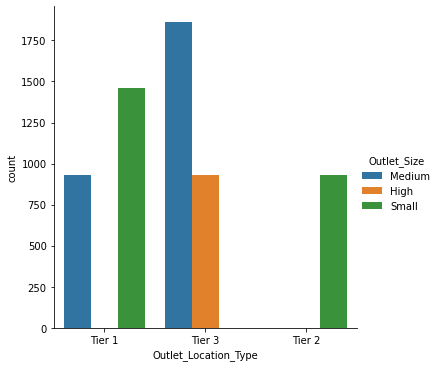

In [41]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

In [42]:
full_data = [train_data, test_data]
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)

In [43]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [44]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [46]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

[08:12:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1098.2495755279024


In [48]:
X_t = test_datar[feat_cols]
y_result = XGB.predict(X_t)
print(y_result)

[1589.1945 1411.1958 1019.7632 ... 1862.6682 4009.5142 1298.3594]


In [49]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_XGBoost3.csv',index = False)
print(result)

     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049        1589.194458
1              FDW14            OUT017        1411.195801
2              NCN55            OUT010        1019.763184
3              FDQ58            OUT017        2512.541992
4              FDY38            OUT027        5599.582031
...              ...               ...                ...
5676           FDB58            OUT046        2060.083252
5677           FDD47            OUT018        2424.532227
5678           NCO17            OUT045        1862.668213
5679           FDJ26            OUT017        4009.514160
5680           FDU37            OUT045        1298.359375

[5681 rows x 3 columns]
